#  Apple Inc. Stock Price Forecasting Using Python

Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services


Using Time Series Forecasting we are going to analyse Time Series components- Trend, Seasonality, Irregularity and Cyclic for Apple inc Stock prices from last April 2016 to Feb 2019 years.

#### The stock price data is taken from https://www.nasdaq.com/symbol/aapl/stock-chart, NASDAQ site.



At the opening bell of the stock market, investors around the world take notice of the opening price of the market and individual stocks. Where the stock closes for the day determines how well or poorly a stock performed, which is a big deal for not only investors but also financial institutions and other stakeholders.

### Understanding Stock Quotes

Before going into how closing stock prices work, it's important to go over the meaning of a stock's opening price, intraday high and low. If you've ever looked at a financial newspaper or visited a financial website such as Yahoo Finance and looked up a stock quote, you'll notice several prices listed for the same stock. The "open" is the starting price where the stock trades at the opening bell of the stock market.

The "high" is the highest at which the stock traded for the day and the "low" is the lowest price for the trading day. You'll also notice a "52-week range" for the stock. This is the highest and lowest stock prices for the stock over a one-year period.

The closing stock price is where the stock traded at the closing bell. For example, a stock quote for Apple Inc. shows a closing stock price of $ 174.18 on Feb. 5, 2019. The stock opened at $172.86 on that day.

### Why Closing Price is important 

The closing stock price is significant for several reasons. Investors, traders, financial institutions, regulators and other stakeholders use it as a reference point for determining performance over a specific time such as one year, a week and over a shorter time frame such as one minute or less. In fact, investors and other stakeholders base their decisions on closing stock prices. Institutional investors monitor a stock's closing price to make decisions regarding their investment portfolios.

In [2]:
import numpy as np
import pandas as pd

In [3]:
import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                  
import warnings                 
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('applestocksapril16tofeb19.csv', index_col=['date'], parse_dates=['date'])

In [5]:
data.head()

,close,volume,open,high,low
date,,,,,
2019-02-28,173.15,27953810,174.32,174.91,172.9200
2019-02-27,174.87,27817640,173.21,175.00,172.7300
2019-02-26,174.33,16991610,173.71,175.30,173.1732
2019-02-25,174.23,21846400,174.16,175.87,173.9500
2019-02-22,172.97,18890250,171.58,173.00,171.3800


In [6]:
data.index

DatetimeIndex(['2019-02-28', '2019-02-27', '2019-02-26', '2019-02-25',
               '2019-02-22', '2019-02-21', '2019-02-20', '2019-02-19',
               '2019-02-15', '2019-02-14',
               ...
               '2016-04-14', '2016-04-13', '2016-12-04', '2016-11-04',
               '2016-08-04', '2016-07-04', '2016-06-04', '2016-05-04',
               '2016-04-04', '2016-01-04'],
              dtype='datetime64[ns]', name='date', length=733, freq=None)

indexing date has its uses, we can used this index to calculate measures like mean median for specific period of time 

In [7]:
print("The Avg Closed Stock price of year 2019 is", round(data['2019-01-01' : '2019-12-31'].close.mean(), 2))

The Avg Closed Stock price of year 2019 is 162.51


In [8]:
ts =  data['close']

In [9]:
type(ts)

pandas.core.series.Series

[]

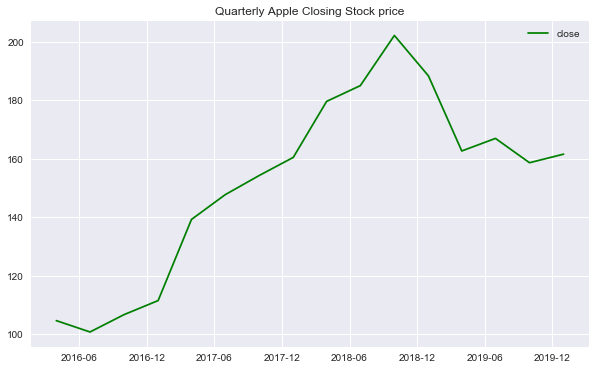

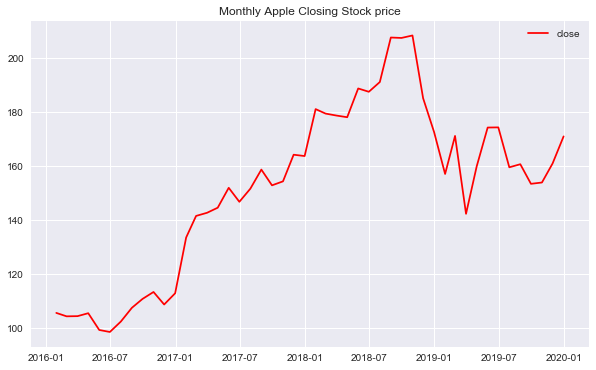

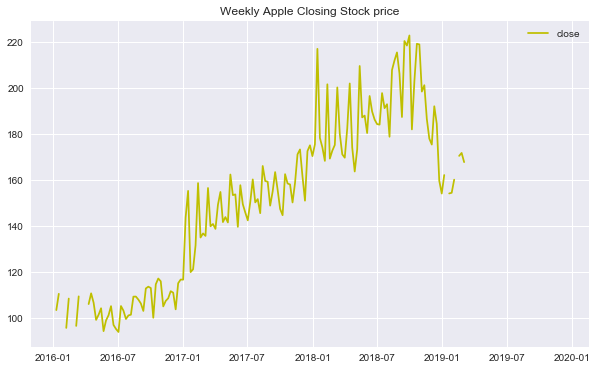

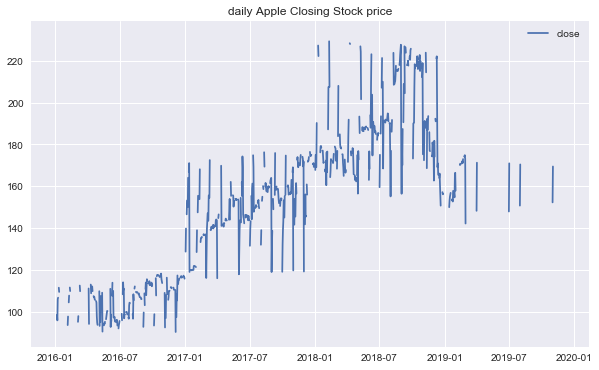

In [11]:
qt = data.close.resample('Q').mean()

plt.figure(figsize=(10, 6))
plt.plot(qt,color='g')
plt.title('Quarterly Apple Closing Stock price')
plt.legend()
plt.plot()

mt = data.close.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(mt,color='r')
plt.title('Monthly Apple Closing Stock price')
plt.legend()
plt.plot()

wk = data.close.resample('W').mean()

plt.figure(figsize=(10, 6))
plt.plot(wk,color='y')
plt.title('Weekly Apple Closing Stock price')
plt.legend()
plt.plot()


dm = data.close.resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(dm)
plt.title('daily Apple Closing Stock price')
plt.legend()
plt.plot()

#### Its Tricky to work with daily data, so transfrom our data into Weekly closed price data using Pandas Resample method

In [12]:
tsw = data['close'].resample('W').mean()

In [13]:
tsw  = tsw.fillna(tsw.bfill())

In [14]:
tsw.head()

date
2016-01-10    103.424
2016-01-17    110.490
2016-01-24     95.680
2016-01-31     95.680
2016-02-07     95.680
Freq: W-SUN, Name: close, dtype: float64

In [15]:
weeklymean = pd.DataFrame(tsw)
weeklymean.tail()
#weeklymean["2019-03-01" :"2019-12-31"]
weeklymean = weeklymean["2016-01-01" :"2019-02-28"]
weeklymean.tail()

,close
date,
2019-01-27,154.420000
2019-02-03,160.118000
2019-02-10,170.466667
2019-02-17,170.466667
2019-02-24,171.747500


In [16]:
tsw = weeklymean['close']
type(tsw)

pandas.core.series.Series

In [17]:
#Droping nans 
tsw = tsw.dropna()

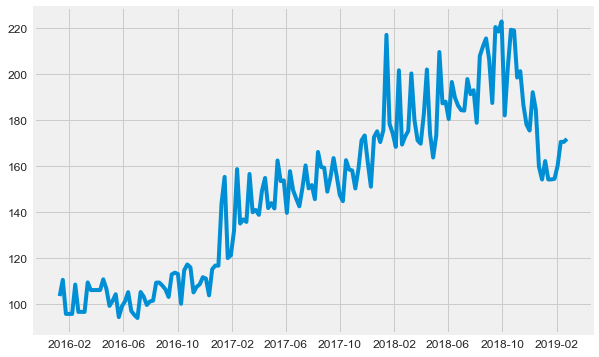

In [18]:
plt.figure(figsize=(10, 6))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

plt.style.use('fivethirtyeight')
plt.plot(tsw)

we were able grasp the trend and seasonality of closed stock prices from the above plots.

### We need to make the time series stationary to apply Statistical Forecasting Methods

The series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean

constant variance

an autocovariance that does not depend on time.

#### Dickey-Fuller Test

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [84]:
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 12, 6

import statsmodels.api as sm

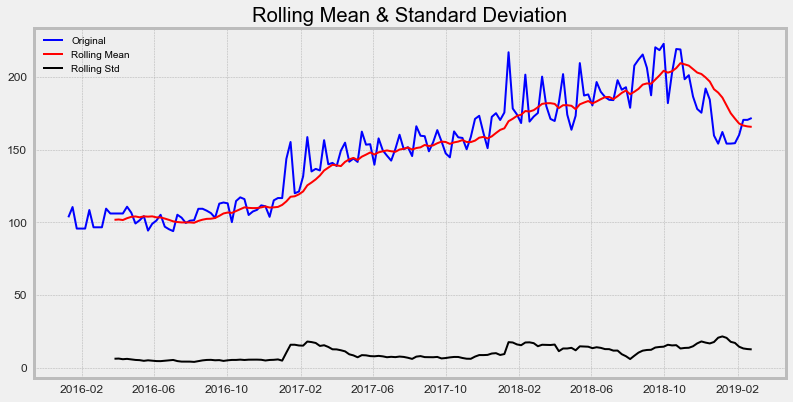

In [85]:
rolmean=tsw.rolling(12).mean()
rolstd = tsw.rolling(12).std()
#Plot rolling statistics:
orig = plt.plot(tsw, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [21]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(tsw, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.399397
p-value                          0.582565
#Lags Used                       9.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64




From The above plots clearly shows that both mean and standard deviation are changing. 
Even from Dickey-Fuller Test, p-value is 0.58 so we cannot reject the null hypothesis. the critical values are supposed to be more than T-statistic whcih is not the case.

#### Differencing is done make time series stationary and it also removes trend and seasonality  

In [31]:
def tsplot(y, lags=None, figsize=(12, 10), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

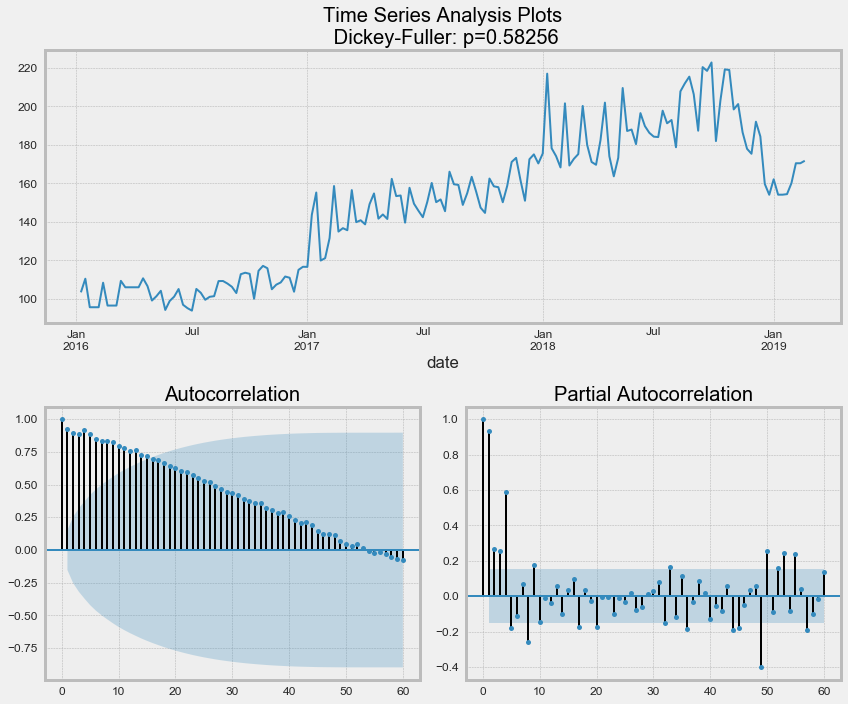

In [86]:
tsplot(tsw, lags=60)


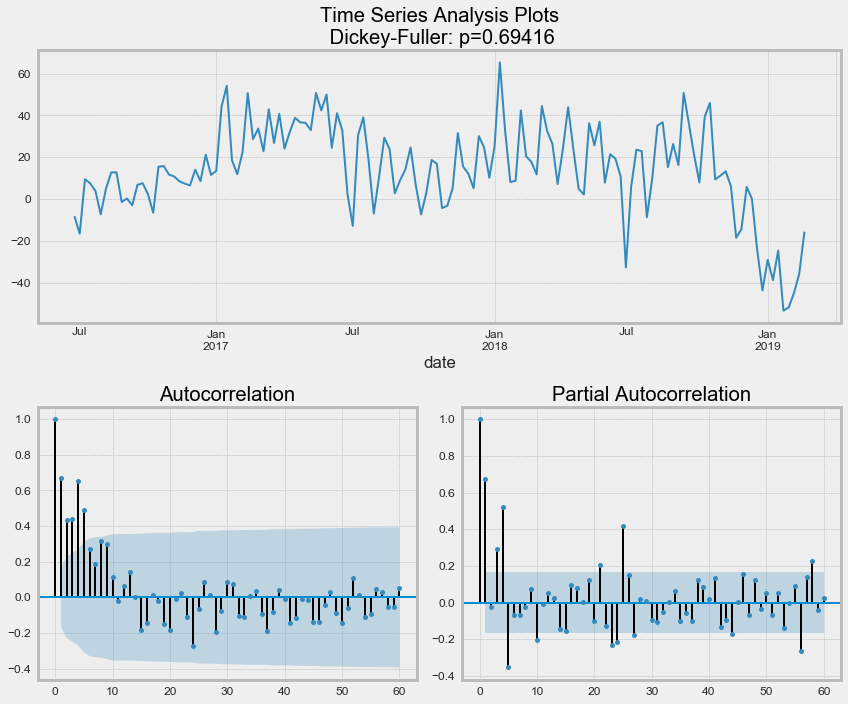

In [33]:
tsw_diff = tsw - tsw.shift(24)
tsplot(tsw_diff[24:], lags=60)

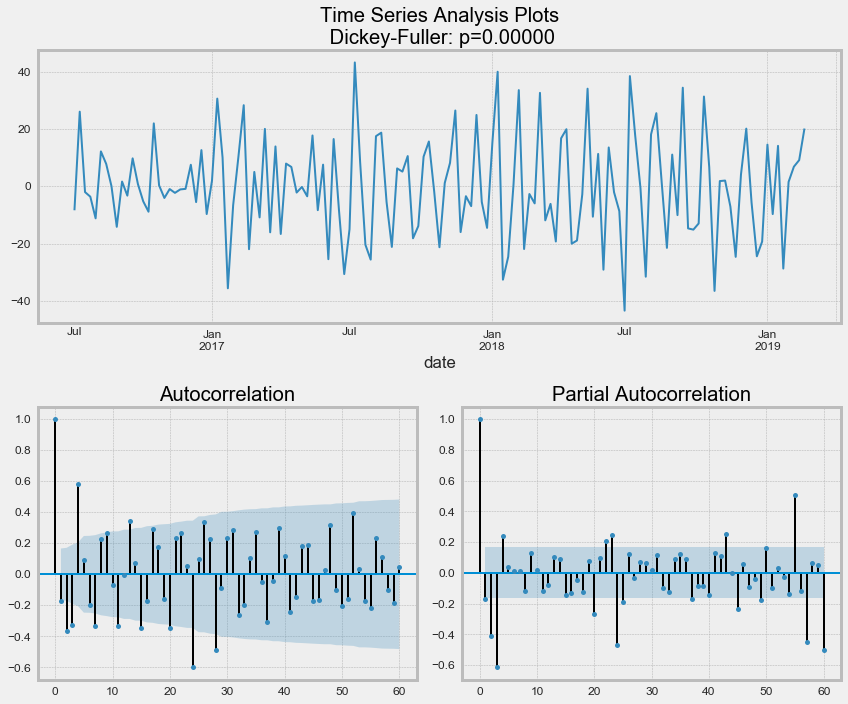

In [34]:
tsw_diff = tsw_diff - tsw_diff.shift(1)
tsplot(tsw_diff[24+1:], lags=60)

In [36]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)



36

In [37]:
#!pip install tqdm
parameters_list

[(2, 2, 0, 0),
 (2, 2, 0, 1),
 (2, 2, 1, 0),
 (2, 2, 1, 1),
 (2, 3, 0, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (2, 3, 1, 1),
 (2, 4, 0, 0),
 (2, 4, 0, 1),
 (2, 4, 1, 0),
 (2, 4, 1, 1),
 (3, 2, 0, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0),
 (3, 2, 1, 1),
 (3, 3, 0, 0),
 (3, 3, 0, 1),
 (3, 3, 1, 0),
 (3, 3, 1, 1),
 (3, 4, 0, 0),
 (3, 4, 0, 1),
 (3, 4, 1, 0),
 (3, 4, 1, 1),
 (4, 2, 0, 0),
 (4, 2, 0, 1),
 (4, 2, 1, 0),
 (4, 2, 1, 1),
 (4, 3, 0, 0),
 (4, 3, 0, 1),
 (4, 3, 1, 0),
 (4, 3, 1, 1),
 (4, 4, 0, 0),
 (4, 4, 0, 1),
 (4, 4, 1, 0),
 (4, 4, 1, 1)]

In [38]:
#parameters_list
import itertools
p = q = range(2, 5)
d = range(2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 0, 3) x (2, 0, 3, 12)
SARIMAX: (2, 0, 3) x (2, 0, 4, 12)


In [34]:
seasonal_pdq

[(2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12)]

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsw,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:1364.770551351843
ARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:1284.250408580568
ARIMA(2, 0, 2)x(2, 0, 4, 12)12 - AIC:1198.3823171450565
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:1287.4707396019653
ARIMA(2, 0, 2)x(2, 1, 3, 12)12 - AIC:1203.8913855325582
ARIMA(2, 0, 2)x(2, 1, 4, 12)12 - AIC:1093.59907061941
ARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:1290.2270862949622
ARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:1285.5884433667277
ARIMA(2, 0, 2)x(3, 0, 4, 12)12 - AIC:1198.5197241059573
ARIMA(2, 0, 2)x(3, 1, 2, 12)12 - AIC:1204.173664672402
ARIMA(2, 0, 2)x(3, 1, 3, 12)12 - AIC:1194.82666273612
ARIMA(2, 0, 2)x(3, 1, 4, 12)12 - AIC:1090.9679057472658
ARIMA(2, 0, 2)x(4, 0, 2, 12)12 - AIC:1196.248240851281
ARIMA(2, 0, 2)x(4, 0, 3, 12)12 - AIC:1194.9685093542275
ARIMA(2, 0, 2)x(4, 0, 4, 12)12 - AIC:1185.2980888463853
ARIMA(2, 0, 2)x(4, 1, 2, 12)12 - AIC:1112.7508559784292
ARIMA(2, 0, 2)x(4, 1, 3, 12)12 - AIC:1102.5621821597226
ARIMA(2, 0, 2)x(4, 1, 4, 12)12 - AIC:1099.23799927947
AR

ARIMA(4, 1, 3)x(3, 0, 2, 12)12 - AIC:1211.6722293152216
ARIMA(4, 1, 3)x(3, 0, 3, 12)12 - AIC:1219.7127583361912
ARIMA(4, 1, 3)x(3, 0, 4, 12)12 - AIC:1135.3853301752224
ARIMA(4, 1, 3)x(3, 1, 2, 12)12 - AIC:1197.2659483833909
ARIMA(4, 1, 3)x(3, 1, 3, 12)12 - AIC:1222.679083318833
ARIMA(4, 1, 3)x(3, 1, 4, 12)12 - AIC:4608.855539723643
ARIMA(4, 1, 3)x(4, 0, 2, 12)12 - AIC:1260.3856089778658
ARIMA(4, 1, 3)x(4, 0, 3, 12)12 - AIC:1249.2849256462137
ARIMA(4, 1, 3)x(4, 0, 4, 12)12 - AIC:1205.1495638920276
ARIMA(4, 1, 3)x(4, 1, 2, 12)12 - AIC:1134.062727938504
ARIMA(4, 1, 3)x(4, 1, 3, 12)12 - AIC:1116.5404689683337
ARIMA(4, 1, 3)x(4, 1, 4, 12)12 - AIC:6626.9122546650115
ARIMA(4, 1, 4)x(2, 0, 2, 12)12 - AIC:1282.2734942613783
ARIMA(4, 1, 4)x(2, 0, 3, 12)12 - AIC:1204.8135651244822
ARIMA(4, 1, 4)x(2, 0, 4, 12)12 - AIC:1105.591905771721
ARIMA(4, 1, 4)x(2, 1, 2, 12)12 - AIC:1213.2975396543943
ARIMA(4, 1, 4)x(2, 1, 3, 12)12 - AIC:1120.545947979532
ARIMA(4, 1, 4)x(2, 1, 4, 12)12 - AIC:5609.66630735073

In [39]:
#ARIMA(4, 1, 4)x(4, 1, 3, 12)12 - AIC:1046.5638662313872 lowest of AIC
mod = sm.tsa.statespace.SARIMAX(tsw,
                                order=(4, 1, 4),
                                seasonal_order=(4, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [40]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              close   No. Observations:                  164
Model:             SARIMAX(4, 1, 4)x(4, 1, 3, 12)   Log Likelihood                -368.506
Date:                            Tue, 26 Mar 2019   AIC                            769.011
Time:                                    13:00:59   BIC                            810.533
Sample:                                01-10-2016   HQIC                           785.811
                                     - 02-24-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2136      0.499     -2.432      0.015      -2.192      -0.236
ar.L2         -0.9790      0.433   

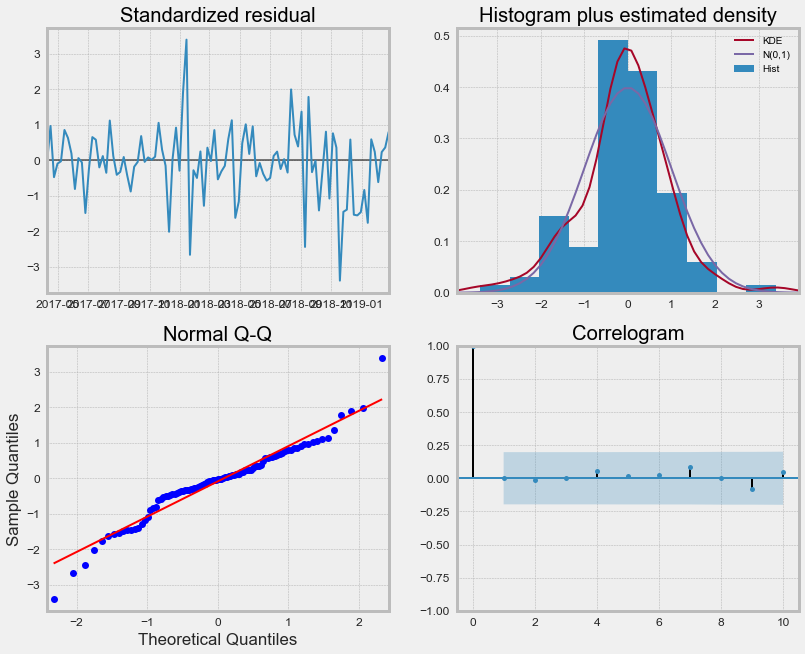

In [83]:
rs = results.plot_diagnostics(figsize=(12, 10))
#fig = plt.plot.get_figure()
plt.style.use('bmh')
rs.savefig("Arima_Diagnostics.png")
plt.show()

#### It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let's make predictions using our model.

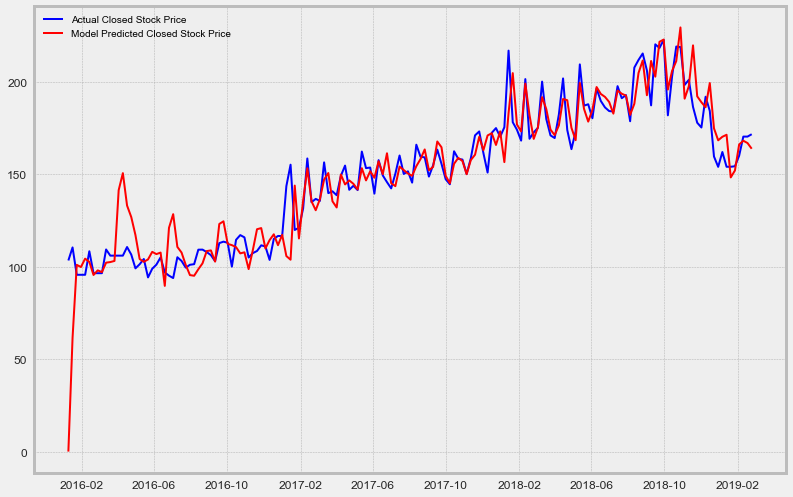

In [54]:
plt.figure(figsize=(12, 8))
plt.style.use('bmh')
plt.plot(tsw, label= 'Actual Closed Stock Price', color = 'blue')
plt.plot(results.fittedvalues, color='red', label= 'Model Predicted Closed Stock Price')
plt.legend()
plt.savefig("Arima_model.png")

In [62]:
data1 = pd.DataFrame(tsw)

In [63]:
data1['Arima_Forecasted_Values'] = results.fittedvalues

In [64]:
data1.tail(20)

,close,Arima_Forecasted_Values
date,,
2018-10-14,202.955000,205.985069
2018-10-21,219.206000,211.323619
2018-10-28,218.914000,229.533624
2018-11-04,198.424000,190.985637
2018-11-11,201.200000,197.731729
2018-11-18,186.520000,219.834734
2018-11-25,177.977500,192.256075
2018-12-02,175.390000,189.053874
2018-12-09,192.048000,186.352011


In [58]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
    # calculate error, again having shifted on s+d steps from the beginning
error = mean_absolute_percentage_error(data1['close'], data1['Arima_Forecasted_Values'])

In [66]:
error

6.554211347011211

### From MAPE value we can conclude that Our model was wrong by 6.55% on average

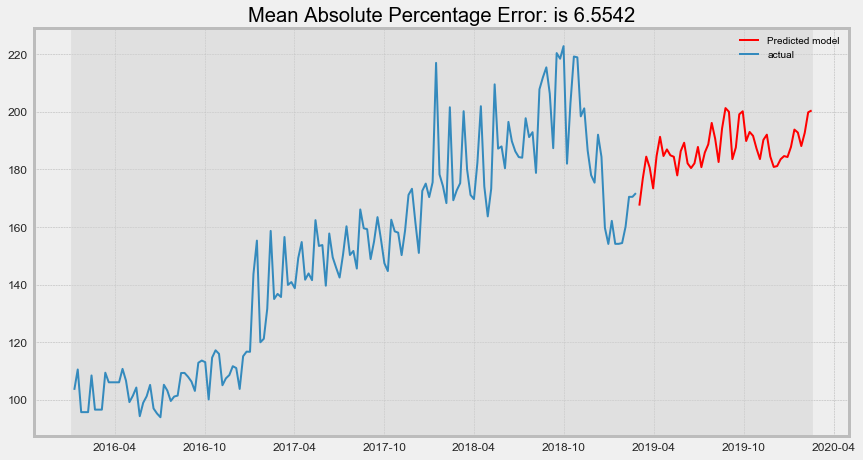

In [175]:
data1['Arima_Forecasted_Values']= np.NaN

forecast = results.predict(start = data1.shape[0], end = data1.shape[0]+50)
forecast = data1.Arima_Forecasted_Values.append(forecast)

plt.figure(figsize=(13, 7))
plt.title("Mean Absolute Percentage Error: is 6.5542")
plt.plot(forecast, color='r', label="Predicted model")
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(tsw, label="actual")
plt.legend()
plt.savefig("Forecasted_ARIMA_model.png")

plt.grid(True);

In [72]:
predicted =pd.DataFrame(forecast)

In [153]:
predicted = predicted.dropna()
march_predicted = predicted[:4]
march_predicted

,0
2019-03-03,167.417130
2019-03-10,176.822512
2019-03-17,184.422320
2019-03-24,180.606736


In [183]:
marchdata = pd.read_csv('marchapplestock.csv', parse_dates=['date'], index_col=['date'])

In [184]:
marchdata.dropna()

,close,volume,open,high,low
date,,,,,
2019-03-20,188.16,31003380,186.23,189.49,184.73
2019-03-19,186.53,31440300,188.35,188.99,185.92
2019-03-18,188.02,26148590,185.80,188.39,185.79
2019-03-15,186.12,39017490,184.85,187.33,183.74
2019-03-14,183.73,23527660,183.90,184.10,182.56
2019-03-13,181.71,30929740,182.25,183.30,180.92
2019-12-03,180.91,32416800,180.00,182.67,179.37
2019-11-03,178.90,31123000,175.49,179.12,175.35
2019-08-03,172.91,23985960,170.32,173.07,169.50


In [185]:
 week =marchdata['close'].resample('W').mean()

In [186]:
week  = week.fillna(week.bfill())

In [187]:
week = pd.DataFrame(week)
week

,close
date,
2019-01-06,174.970000
2019-01-13,183.853333
2019-01-20,183.853333
2019-01-27,183.853333
2019-02-03,183.853333
2019-02-10,183.853333
2019-02-17,183.853333
2019-02-24,183.853333
2019-03-03,183.853333


In [176]:
March_actual = week['2019-03-01' : '2019-03-24']
March_actual = pd.DataFrame(March_actual.rename(columns={'close': "Actual_ClosedStockPrice"}))
march_predicted = march_predicted.rename(columns={0: "Model_Predicted_ClosedStockPrice"})

march_predicted = pd.DataFrame(march_predicted)
March_actual
# March_actual1 = pd.concat([March_actual,march_predicted], ignore_index= False)
# March_actual1
march_predicted


,Model_Predicted_ClosedStockPrice
2019-03-03,167.417130
2019-03-10,176.822512
2019-03-17,184.422320
2019-03-24,180.606736


In [177]:
March_actual

,Actual_ClosedStockPrice
date,
2019-03-03,183.853333
2019-03-10,183.853333
2019-03-17,183.853333
2019-03-24,187.570000


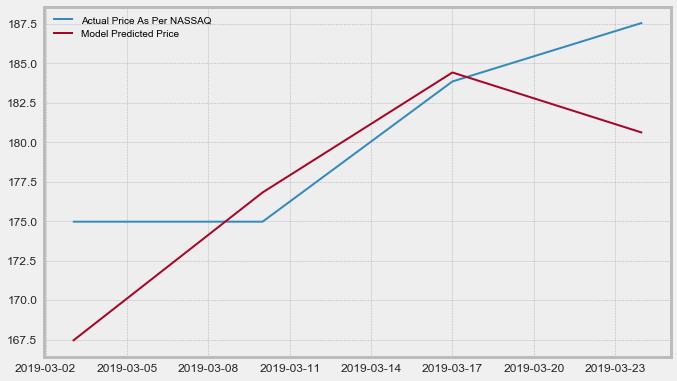

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(week['2019-03-01' : '2019-03-24'], label ='Actual Price As Per NASSAQ')
plt.plot(predicted[:4], label = 'Model Predicted Price')
plt.legend()

plt.savefig("March_Predictions.png")